# Analysis of Povety in America and the Implications of Race on Proverty Status

## Introduction

Britannica defines poverty as "the state of one who lacks a usual or socially acceptable amount of money or material possessions" causing thme to "lack the means to satisfy their basic needs" (1). While this definition is relatively vague and open to interpretation, especially in regard to what constitues as a basic need, the underlying gist is that a person who lives in poverty cannot pay for food, clean water, clothing, and shelter. While the measure of poverty varies across nations, where in its extreme it's recognized as living on less than $1.90 per day in the USA, the marker for living in poverty is not as low as you may think (2). In fact, roughly 11.6% of the US population lives in poverty (as of January 2021) -- that's 37.9 million Americans (3). 

People generally associate poverty exclusively to income, but that's a tremendous misconcpetion. In reality, poverty can be measured across 3 dimensions: health, education, and standard of living (2). This means when examining poverty, professionals look at child mortality rates and nutrition, school attendance, and electricity, sanitation, and housing, to give a few examples. This means poverty is not only what you can and cannot buy, but likewise an the quality of one's overall human exeperience. 

Poverty can be a difficult topic of study as it's not only difficult to define, but also difficult to generalize. There are many factors to consider when examining poverty rates in the USA. This includes age, gender, immigration status, familial status, ethnicity, geographical location, disability, race, and income, just to name a few examples, and it's increasingly difficult when you take into account that the aformentioned factors are not independent --  in most cases they intersect. While we recognize all the factors mentioned above are important, in this project we will only look at race and income for the sake of being as thorough as we can. 

The purpose of this project is to analyze poverty across America in the context of race. In other words, we're looking to see if there's a trend between poverty status and the race in which one identifies as to see if race is an indicator of poverty and we'll look closely at income in our research. 

Do certain races tend to have higher poverty rates than others? On the flip side, do certain races have have lower rates than others? The goal in asking these questions and making the differentiation based on race is to indubitabily inidentify social and economic inequalities in American society. Certain members of our country endure systematic discrimination on account of their race that keeps them from recieving the same opprotunities and having the same experiences as their counterparts. If there is indeed a correaltion between poverty and race that would mean many Americans are enduring an injustice that they'll like never be able to break away from. And because poverty is a cycle, families will be affected across generations. 

Once we can recognize that these inequalities, and prove so beyond a shadow of a doubt, we can then take steps to rectify the error.

For the purpose of this study we recognize the following 5 races: White, Black, Asian, Native Hawaiian or Pacific Islander, American Indian or Alaska Native, and we'll look at poverty statistics collected by the US government, as far back as 1959 and as recently as 2022, that record these races so that can can make direct generalizations. 

We've collected tables that look at per capita income, poverty rates in regards to the total US population, and poverty status by race which we'll thoroughly analyze to make a confident hypothesis. We'll then use linear regression and machine learning to accept or reject this hypothesis. 

This tutorial will walk you through the entire data science pipeline, which includes the following 5 stages:

1. Data Collection
2. Data Processing 
3. Exploratory Analysis and Data Visualization
4. Analysis, Hypothesis Testing, and Machine Learning
5. Insight and Policy Decision


Sources: 
1. Britannica, T. Editors of Encyclopaedia (2023, April 6). poverty. Encyclopedia Britannica. https://www.britannica.com/topic/poverty
2. https://www.worldvision.ca/stories/child-sponsorship/what-is-poverty
3. https://www.cnbc.com/2023/03/07/why-poverty-might-be-far-worse-in-the-us-than-its-reported.html#:~:text=As%20of%20January%202021%2C%2037.9,the%20United%20States%20Census%20Bureau


Here are the packages we'll need for the tutorial.

In [ ]:
import seaborn  
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Data Collection, Processing, and Cleaning

Our tutorial begins with collecting, processing and cleaning out data. As you can see, we've combined the first 2 stages of the data science pipeline. We've done this because collecting the data and processing it as you go is often the most organized and consistent course of action. Once you have your data, you might as well process and clean so it while its right. These prevents forgetting steps in cleaning data and data loss that can occur when switching back and forth between dataframes.

At this point you're probably wondering why to even bother cleaning data. Here are several reasons why its important: 

- You can present your data in a more human readable form, that allows for easier and more accurate interpretation of data.
- It ensures data is in the correct format to be used later on. For example, making sure dollars are integers or floats so we can perform calculations on them. 
- It makes the data more concise because we can drop columns that are not useful and rows that are incomplete (such as because of null values).
- Going back to add changes when necessary is easier when all the cleaning code is with the table collection because everything is in one place.

The next 3 tables were collected by doing a few google searches and then downloading the tables as csv's and excel sheets. In these formats, it quick and easy to read the data into a dataframe using pandas. 

### Table 1: CPS Population and Per Capita Money Income, All People: 1967 to 2021

The first table was downloaded as a CSV so we can us pandas read_csv to read it into a datafram

In [3]:
data1 = pd.read_csv("p01ar.csv", header=6) #header starts in row 6
data1.head(7)

# this constitues data collection

,Year,Number (thousands),Per capita income,Unnamed: 3
0,NaN,NaN,Current\ndollars,2021\ndollars
1,2021,"328,722","41,285","41,285"
2,2020 (41),"328,059","38,931","40,749"
3,2019,"325,268","39,156","41,496"
4,2018,"324,356","36,080","38,929"
5,2017 (40),"323,144","35,048","38,737"
6,2017,"323,156","34,489","38,119"


Here's what the first 7 rows of the dataframe (data1) look like. Immediately, there are several issues.

- Frist, there are 2 rows of heading which makes the table confusing to read. 'Current\ndollars' and '2021\ndollars are subsets' of Per capita income. They'll need to be combined so there's only 1 row of heading and 4 columns. Then, the extra rows can be dropped.

- Next, the 'Year' column has extra values in some of the rows. These values must be removed so that there's only the years because I dont know what those valus mean and keeping them will complicate graphs we'll make later on. 

- Last, we much check the numerical valueas are integers and floats so we can perform caluclations on them later.


In [4]:
data1 = data1.rename(columns = {"Per capita income": "Current PCI in Dollars", "Unnamed: 3":"2021 PCI in Dollars"}) #rename headers
data1 = data1.drop(index = [0]) # now can drop the first row 
data1.head(7)
#PCI = Per Capita Income

#now we're in the realm of data processing

,Year,Number (thousands),Current PCI in Dollars,2021 PCI in Dollars
1,2021,"328,722","41,285","41,285"
2,2020 (41),"328,059","38,931","40,749"
3,2019,"325,268","39,156","41,496"
4,2018,"324,356","36,080","38,929"
5,2017 (40),"323,144","35,048","38,737"
6,2017,"323,156","34,489","38,119"
7,2016,"320,372","33,205","37,490"


In [5]:
data1['Year'] = data1['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) #want to remove the numbers in paranthesis next to the years
data1['Number (thousands)'] = data1['Number (thousands)'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1['Current PCI in Dollars'] = data1['Current PCI in Dollars'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1['2021 PCI in Dollars'] = data1['2021 PCI in Dollars'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1 = data1.astype({'Number (thousands)': int, 'Current PCI in Dollars': int, '2021 PCI in Dollars':int})
data1.head(15)
#changed last 3 columns into integers in case calculation is necessary later

,Year,Number (thousands),Current PCI in Dollars,2021 PCI in Dollars
1,2021,328722,41285,41285
2,2020,328059,38931,40749
3,2019,325268,39156,41496
4,2018,324356,36080,38929
5,2017,323144,35048,38737
6,2017,323156,34489,38119
7,2016,320372,33205,37490
8,2015,318868,31653,36198
9,2014,316168,30176,34569
10,2013,313443,30027,34980


In the segment above, we had to remove ',' from the last 3 columns so that they could be turned into ints. 

### Table 2: People in Poverty by Nativity: 1993 to 2021

This table was downloaded as a excel sheet, so we can read it in using panda's read_excel

In [6]:
data2 = pd.read_excel("hstpov16.xlsx", header = 3) #note: 2 levels of headers
data2.head()

,Year,All people,Unnamed: 2,Unnamed: 3,Native,Unnamed: 5,Unnamed: 6,Foreign-born,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,NaN,NaN,Naturalized citizen,NaN,NaN,Not a citizen,NaN,NaN
1,NaN,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty
2,2021,328191,37933,11.6,281383,31083,11,46808,6850,14.6,22874,2428,10.6,23934,4422,18.5
3,2020 (1),327570,37548,11.5,282408,31485,11.1,45162,6063,13.4,22800,2087,9.2,22362,3977,17.8
4,2019,324754,33984,10.5,279867,28342,10.1,44886,5643,12.6,22746,2038,9,22140,3605,16.3


This is dataframe is extremely confusing to look at because of the way the information was organzied. The current header distinguished by people groups, the first row distinguished by citizenship, and the next row labels what information is held in that column.

We're going to do several things.

- Frist, we're going to remove all the columns except the first 4. Evidently, that's a lot of coluns to remove, for simplicity, we'll make a new dataframe and use pandas to extract the 4 four columns from the old dataframe into the new one.

- Next, as we did with the first table, we're going to remove extra values in the year column.

- After, we're going to rename our columns with the table names at row index 1. 

- Lastly, we're going to drop the first 2 rows.

In [7]:
#just want Native groups
dataNew = data2.loc[:, ["Year","Native","Unnamed: 5", "Unnamed: 6"]]

dataNew['Year'] = dataNew['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) #want to remove the numbers in paranthesis next to the years

dataNew = dataNew.rename(columns = {"Native": "Total", "Unnamed: 5":"Number in Poverty", "Unnamed: 6": "Percent in Poverty"}) #rename headers
dataNew = dataNew.drop(index = [0,1])

dataNew.head(7)

,Year,Total,Number in Poverty,Percent in Poverty
2,2021,281383,31083,11
3,2020,282408,31485,11.1
4,2019,279867,28342,10.1
5,2018,278051,31828,11.4
6,2017,277131,33143,12
7,2017,277158,33095,11.9
8,2016,276089,33999,12.3


### Table 3: Poverty Status of People by Family Relationship, Race, and Hispanic Origin: 1959 to 2021

This table was downloaded as a excel sheet, so we can read it in using panda's read_excel

In [8]:
data3 = pd.read_excel("/Users/managammi/CMSC320/mgammi.github.io/hstpov2 .xlsx", header = 4 ) #several headers, first one starts on line 4
data3.head()
#Note, population is in thousands"
# dont any drop the rows or the rest of the dataframes will be affected too
# clean up data3 here so the subsets of data retrieved from it are cleaner already 

,Year,All people,Unnamed: 2,Unnamed: 3,People in families,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unrelated individuals,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,All families,NaN,NaN,"Families with female householder, no spouse pr...",NaN,NaN,NaN,NaN,NaN
1,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN
2,NaN,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent
3,2021,328191,37933,11.6,263764,25077,9.5,48476,12264,25.3,63398,12513,19.7
4,2020 (1),327570,37548,11.5,264437,25232,9.5,48984,12469,25.5,62097,11963,19.3


This table is a mess so we're going to do several things and in this order.

1. Rename columns so they're indicative of the informaiton they hold. Like the previous tables, looks like the headers are multiple rows so we need to look at the first few rows. 
2. Drop columns we dont need. We're not distinguishing by family status, so we'll remove the columns pertaining to that. 
3. Create new dataframes so that the information can be seperated by race. You cant tell from the table above, but the excel_sheet we downloaded is composed of several tables. So by using indices and pandas iloc, we can take slices of the dataframe and make a new dataframe out if it. 

In [9]:
data3 = data3.rename(columns = {"All people" : "Total Number", "Unnamed: 2": "Number Below Poverty", 
                                "Unnamed: 3": "Percent Below Poverty"})
data3 = data3.loc[:, ["Year", "Total Number","Number Below Poverty","Percent Below Poverty"]]
data3['Year'] = data3['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) #want to remove the numbers in paranthesis next to the years
data3.head()

# not gonna drop first few rows bc affects rest of new dataframes with indices

,Year,Total Number,Number Below Poverty,Percent Below Poverty
0,NaN,NaN,NaN,NaN
1,NaN,Total,Below poverty,NaN
2,NaN,NaN,Number,Percent
3,2021,328191,37933,11.6
4,2020,327570,37548,11.5


Important note: we're not dropping any rows because we're going to 'slice' the dataframe anyway and this would throw off indices we're going to use. 

In [10]:
#splitting up data into different tables for each race
dataAllRaces= data3.iloc[3:68,:]
dataAllRaces

,Year,Total Number,Number Below Poverty,Percent Below Poverty
3,2021,328191,37933,11.6
4,2020,327570,37548,11.5
5,2019,324754,33984,10.5
6,2018,323847,38146,11.8
7,2017,322548,39564,12.3
...,...,...,...,...
63,1963,187258,36436,19.5
64,1962,184276,38625,21
65,1961,181277,39628,21.9
66,1960,179503,39851,22.2


now......

In [11]:
dataWhite = data3.iloc[73:143,:]
dataWhite['Race'] = 'White'
dataWhite= dataWhite.dropna()
dataWhite

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
73,2021,248909,24919,10,White
74,2020,249083,25183,10.1,White
75,2019,248086,22512,9.1,White
76,2018,247634,24945,10.1,White
77,2017,247255,26026,10.5,White
...,...,...,...,...,...
138,1963,165309,25238,15.3,White
139,1962,162842,26672,16.4,White
140,1961,160306,27890,17.4,White
141,1960,158863,28309,17.8,White


In [12]:
dataBlack = data3.iloc[236:300,:]
dataBlack['Race'] = 'Black'
dataBlack = dataBlack.dropna()
dataBlack

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
236,2021,43976,8583,19.5,Black
237,2020,43694,8556,19.6,Black
238,2019,42965,8073,18.8,Black
239,2018,42773,8884,20.8,Black
240,2017,42477,9224,21.7,Black
241,2017,42474,8993,21.2,Black
242,2016,41962,9234,22,Black
243,2015,41625,10020,24.1,Black
244,2014,41112,10755,26.2,Black
245,2013,40498,10186,25.2,Black


In [13]:
dataAsian= data3.iloc[332:374,:]
dataAsian['Race'] = 'Asian/Pacific Islander'
dataAsian = dataAsian.dropna()
dataAsian

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
332,2021,20676,1922,9.3,Asian/Pacific Islander
333,2020,20352,1645,8.1,Asian/Pacific Islander
334,2019,19926,1464,7.3,Asian/Pacific Islander
335,2018,19768,1996,10.1,Asian/Pacific Islander
336,2017,19526,1891,9.7,Asian/Pacific Islander
337,2017,19475,1953,10,Asian/Pacific Islander
338,2016,18879,1908,10.1,Asian/Pacific Islander
339,2015,18241,2078,11.4,Asian/Pacific Islander
340,2014,17790,2137,12,Asian/Pacific Islander
341,2013,17257,2255,13.1,Asian/Pacific Islander


In [14]:
dataNA= data3.iloc[406:448,:]
dataNA['Race'] = 'American Indian/AN' #Native American, Alaska Native
dataNA = dataNA.dropna()
dataNA

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
406,2021,4109,998,24.3,American Indian/AN
407,2020,3950,791,20,American Indian/AN
408,2019,3735,677,18.1,American Indian/AN
409,2018,3663,808,22.1,American Indian/AN
410,2017,3616,790,21.8,American Indian/AN
411,2017,3619,750,20.7,American Indian/AN
412,2016,3701,811,21.9,American Indian/AN
413,2015,4269,995,23.3,American Indian/AN
414,2014,3808,1013,26.6,American Indian/AN
415,2013,3074,837,27.2,American Indian/AN


In [15]:
dataHispanic = data3.iloc[480:531,:] 
dataHispanic['Race'] = 'Hispanic' #not technically a race, but we'll take note
dataHispanic = dataHispanic.dropna()
dataHispanic

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
480,2021,62482,10690,17.1,Hispanic
481,2020,61769,10520,17,Hispanic
482,2019,60602,9545,15.7,Hispanic
483,2018,59957,10526,17.6,Hispanic
484,2017,59051,10816,18.3,Hispanic
485,2017,59053,10790,18.3,Hispanic
486,2016,57556,11137,19.4,Hispanic
487,2015,56780,12133,21.4,Hispanic
488,2014,55504,13104,23.6,Hispanic
489,2013,54181,13356,24.7,Hispanic


description of what we're doing next

In [16]:
# combining all the DFs
finalDF = pd.concat([ dataHispanic ,dataWhite , dataAsian , dataBlack, dataNA], ignore_index=True, axis=0)
finalDF['Percent Below Poverty'] = finalDF['Percent Below Poverty'].apply(lambda item: float(item))
finalDF

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
0,2021,62482,10690,17.1,Hispanic
1,2020,61769,10520,17.0,Hispanic
2,2019,60602,9545,15.7,Hispanic
3,2018,59957,10526,17.6,Hispanic
4,2017,59051,10816,18.3,Hispanic
...,...,...,...,...,...
244,1991,1793,562,31.3,American Indian/AN
245,1990,1560,444,28.5,American Indian/AN
246,1989,1445,345,23.9,American Indian/AN
247,1988,1454,440,30.2,American Indian/AN


exit

### Table 4: Poverty Rate by Race and Ethnicity

In [ ]:
# header = {
#     'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
#     'From': 'pleaseletmein@gmail.com'}
# povByRace = requests.get('https://www.kff.org/other/state-indicator/poverty-rate-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D', 
#                                  headers = header)
# soup1 = BeautifulSoup(povByRace.content, 'html.parser')
# print(soup1.prettify())

# table1 = soup1.findAll('table')

# tables = pd.read_html(str(table1))
# df = tables[0]

# df

#maybe we should try to scrape it so we can show more complicated code and have more code 

povByRace = pd.read_csv("povRace.csv", header=2)
povByRace.head(20)


,Location,White,Black,Hispanic,Asian/Native Hawaiian and Pacific Islander,American Indian/Alaska Native,Multiple Races,Total,Footnotes
0,United States,0.095,0.217,0.176,0.102,0.259,0.141,0.128,1.0
1,Alabama,0.119,0.247,0.244,0.114,0.144,0.184,0.160,NaN
2,Alaska,0.078,0.251,0.130,NaN,0.206,0.124,0.110,NaN
3,Arizona,0.089,0.168,0.171,0.111,0.348,0.105,0.129,NaN
4,Arkansas,0.137,0.272,0.218,0.116,0.117,0.157,0.164,NaN
5,California,0.090,0.194,0.152,0.101,0.225,0.117,0.123,NaN
6,Colorado,0.077,0.177,0.148,0.082,0.156,0.116,0.099,NaN
7,Connecticut,0.068,0.145,0.196,0.080,NaN,0.101,0.101,NaN
8,Delaware,0.073,0.170,0.202,0.072,NaN,0.180,0.112,NaN
9,District of Columbia,0.050,0.280,0.090,0.174,NaN,0.158,0.165,NaN


prose .....

In [21]:
povByRace = povByRace.drop(columns = {"Footnotes"}) #dont need
povByRace.head()

,Location,White,Black,Hispanic,Asian/Native Hawaiian and Pacific Islander,American Indian/Alaska Native,Multiple Races,Total
0,United States,0.095,0.217,0.176,0.102,0.259,0.141,0.128
1,Alabama,0.119,0.247,0.244,0.114,0.144,0.184,0.160
2,Alaska,0.078,0.251,0.130,NaN,0.206,0.124,0.110
3,Arizona,0.089,0.168,0.171,0.111,0.348,0.105,0.129
4,Arkansas,0.137,0.272,0.218,0.116,0.117,0.157,0.164


In [22]:
print(povByRace.dtypes) # want to double check the datatypes of each column are appropriate for the data they hold so they can be best used later

Location                                       object
White                                         float64
Black                                         float64
Hispanic                                      float64
Asian/Native Hawaiian and Pacific Islander    float64
American Indian/Alaska Native                 float64
Multiple Races                                float64
Total                                         float64
dtype: object


description of everything done with table 4 here

### Table 5 : Median Household Income by Race

In [ ]:
https://www.pgpf.org/blog/2023/02/income-and-wealth-in-the-united-states-an-overview-of-recent-data

Do we want to use SQL anywhere????????

## Exploratory Analysis and Data Visualization

Now that the data is clean and more human readable, we can process it

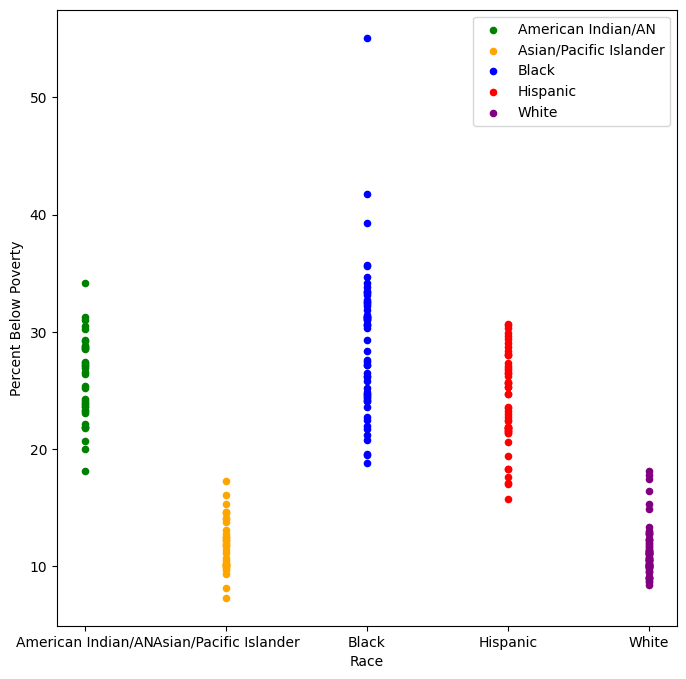

In [25]:
colors = {"American Indian/AN" : "green", "Hispanic" : "red", "Black" : "blue", "White": "purple" , "Asian/Pacific Islander" : "orange"}

fig, ax = plt.subplots(figsize=(8, 8))
groupedDF = finalDF.groupby(['Race'])
for key, group in groupedDF :
        group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Race', label=key,color=colors[key])

plt.xlabel('Race')
plt.ylabel('Percent Below Poverty')
plt.show()

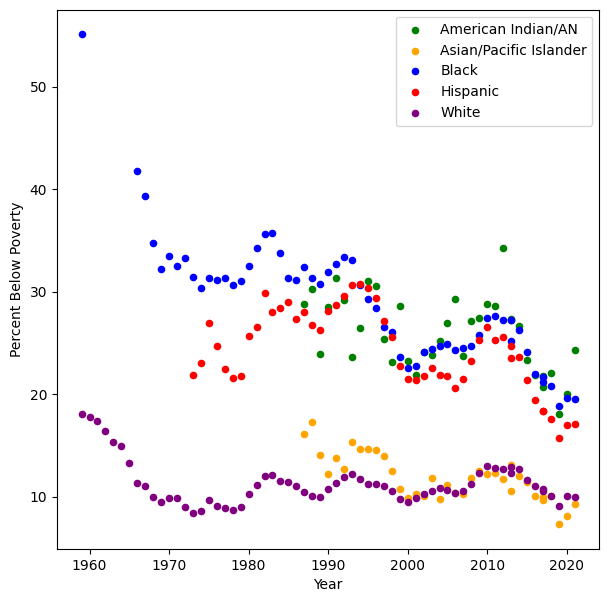

In [24]:
fig, ax = plt.subplots(figsize=(7, 7))
for key, group in groupedDF :
        group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Year', label=key,color=colors[key])

plt.xlabel('Year')
plt.ylabel('Percent Below Poverty')
plt.show()


#should use this plot for linear regression 

American Indian/AN:[343.4226586],[[-0.15840149]]
Asian/Pacific Islander:[336.60689782],[[-0.16201369]]
Black:[632.72875175],[[-0.30279529]]
Hispanic:[321.00392285],[[-0.14855177]]
White:[73.61915234],[[-0.03131719]]


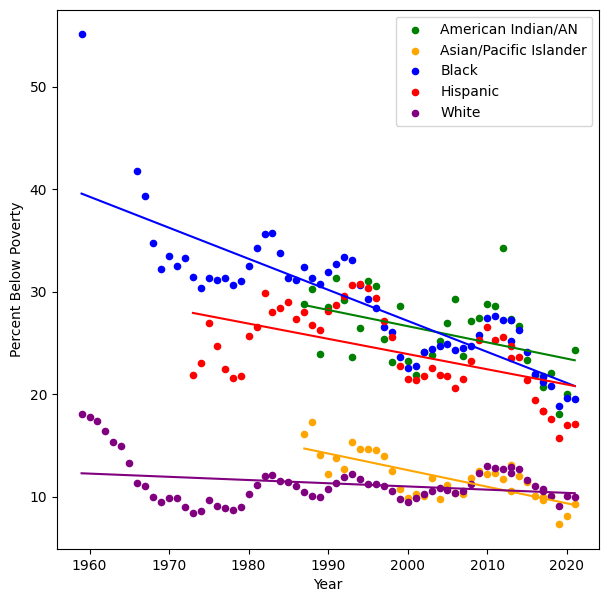

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race,Prediction
0,2021,62482,10690,17.1,Hispanic,
1,2020,61769,10520,17.0,Hispanic,
2,2019,60602,9545,15.7,Hispanic,
3,2018,59957,10526,17.6,Hispanic,
4,2017,59051,10816,18.3,Hispanic,


In [40]:
finalDF['Prediction'] = " "
groupedDF = finalDF.groupby(['Race'])
fig, ax = plt.subplots(figsize=(7, 7))
predictions = {"American Indian/AN" : [], "Hispanic" : [], "Black" :[], "White": [] , "Asian/Pacific Islander" : []}
for key, group in groupedDF :
    group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Year', label=key,color=colors[key])
    x = group['Year'].to_numpy().reshape(-1,1) #saving as valye bc will be using
    reg = LinearRegression().fit(x, group['Percent Below Poverty'].to_numpy().reshape(-1,1))
    race_y_pred = reg.predict(x) #using regression to predict values of y given values of x (can compare this prediction to actual)
    predictions [key]= race_y_pred 
    plt.plot(x,race_y_pred, color = colors[key],  label = str(key) +  " RL")
    print(key +":" + str(reg.intercept_) + "," + str(reg.coef_)) #save for later

plt.xlabel('Year')
plt.ylabel('Percent Below Poverty')
plt.show()


# how to plot predicted values for each group?
finalDF.head()

In [41]:
res = smf.ols(formula= "Percent Below Poverty ~ Race", data=finalDF).fit()
print(res.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.set(style = 'whitegrid') 
finalDF['Residuals'] = res.resid
seaborn.violinplot( data = finalDF, x= 'continent', y='Residuals') 
plt.xlabel('Race')
plt.ylabel('Residuals')
finalDF


#my assumption is that the residuals are too far from the regression line, thereby not meeting the assumptions of linear regression. Its pretty
# obvious, even just with the shapes of the scatter plot, that the regression isnt linear